Data shape: (10, 4, 4)
[[ 3.36302016e-01 -1.43661340e-01             nan  7.12598710e-02]
 [ 3.11808331e+00 -9.41499282e-04 -8.20066674e-01 -4.88543185e-01]
 [            nan -2.61027135e-02  1.20637856e+00             nan]
 [ 2.62261798e-01 -8.73186956e-01 -1.15990970e-01  1.32959888e-01]]


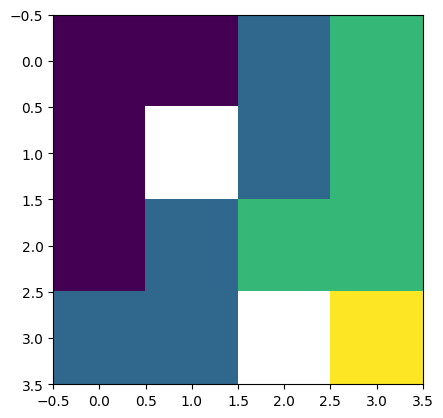

In [15]:
import numpy as np
import matplotlib.pyplot as plt

regions_mask = np.array([[1, 1, 2, 3],
                         [1, np.nan, 2, 3],
                         [1, 2, 3, 3],
                         [2, 2, np.nan, 4]])

n_steps = 10

data = np.random.normal(size=(n_steps, regions_mask.shape[0], regions_mask.shape[1]))
data[:,2,0] = np.nan
data[:,0,2] = np.nan
data[:,2,3] = np.nan
print(f"Data shape: {data.shape}")
print(data[0])

plt.imshow(regions_mask)
plt.show()

In [16]:
# À FAIRE AVANT

# 1 - Prendre l'atlas, bin de façon appropriée PAS en moyenne mais en bonds
# 2 - Remplacer dans l'atlas par np.nan les endroits où les données (binned) ont des nan
# 3 -

def select_region_pixels(regions_mask, region_label, data):
    """Given a region mask, keeps only pixels in data corresponding to a specific region label.
    The rest is converted to np.nan and the array is resized to the smallest array possible containing
    all non-nan values.

    Args:
        regions_mask (np.array): 2d array containing the regions labels
        region_label (int): Region label to keep in the data
        data (np.array): 2d or 3d array to filter using the specified regions mask
    """

    bool_mask = (regions_mask == region_label) # True where the regions correspond with the given index
    masked_data = data*np.where(bool_mask==False, np.nan, 1) # Change values to nan where the mask is False

    # Crop data to smallest bounding box
    valid_rows = np.any(~np.isnan(masked_data[0]), axis=1)  # Check for valid values along height (axis 1)
    valid_cols = np.any(~np.isnan(masked_data[0]), axis=0)  # Check for valid values along width (axis 0)
    

    # Crop data to the smallest bounding box in spatial dimensions (height, width) using the mask
    if data.ndim == 2:
        cropped_data = masked_data[valid_rows, :][:, valid_cols]
    elif data.ndim == 3:
        cropped_data = masked_data[:, valid_rows, :][:, :, valid_cols]
    
    return cropped_data

print(select_region_pixels(regions_mask, region_label=2, data=data)[0])

[[        nan         nan -0.82006667]
 [        nan -0.02610271         nan]
 [ 0.2622618  -0.87318696         nan]]


In [42]:
from toolbox_jocha.ets import format_array

print(f"Data shape before formatting: {data.shape}")
print(f"Number of pixels: {data.shape[1]*data.shape[2]}")

formatted_data = format_array(data)

print(f"Formatted data shape: {formatted_data.shape}")
print(f"Number of removed pixels (np.nan): {(data.shape[1]*data.shape[2])-formatted_data.shape[1]}")

dfc_array = np.random.normal(size=(formatted_data.shape[1],formatted_data.shape[1]))

def select_dfc_indices(regions_mask, region_label, dfc_array):
    
    flattened_regions_mask = regions_mask.flatten()
    flattened_regions_mask = flattened_regions_mask[~np.isnan(flattened_regions_mask)] # Remove nan values

    keep_indices = np.where(flattened_regions_mask==region_label)[0]

    reduced_dfc = dfc_array[keep_indices,:][:,keep_indices] # Select rows, then columns

    return reduced_dfc

# 1 - Flatten l'Atlas (déjà rempli de np.nan) pour obtenir un vecteur 1d
# 3 - Garder dans la dfc les bons labels

print(select_dfc_indices(regions_mask, 2, dfc_array))


Data shape before formatting: (10, 4, 4)
Number of pixels: 16
Formatted data shape: (10, 13)
Number of removed pixels (np.nan): 3
[[-2.57748977  2.86597278 -0.18673772  0.8678471  -0.02457538]
 [ 1.36313213 -0.31386406 -0.74192962 -1.33115519  0.69305451]
 [-0.63430615 -0.13895496 -0.77429031  1.37633132 -0.81938136]
 [-0.09334816  0.06168769 -0.59512663 -0.34952926 -0.37722426]
 [-0.28130581  0.07540617 -1.11380187 -0.28545105 -1.43638564]]


In [24]:
print(regions_mask)

array = regions_mask.flatten()
print(array)
array = array[~np.isnan(array)]
print(array)

[[ 1.  1.  2.  3.]
 [ 1. nan  2.  3.]
 [ 1.  2.  3.  3.]
 [ 2.  2. nan  4.]]
[ 1.  1.  2.  3.  1. nan  2.  3.  1.  2.  3.  3.  2.  2. nan  4.]
[1. 1. 2. 3. 1. 2. 3. 1. 2. 3. 3. 2. 2. 4.]


In [2]:
from toolbox_jocha.connectivity import bin_3d_matrix
import numpy as np


mat = np.random.normal(size=(3,4,7))
bin_size = (2,2)

bin1_mat = bin_3d_matrix(mat, bin_size, method="average")
print(bin1_mat.shape)

bin2_mat = bin_3d_matrix(mat, bin_size, method="skip")
print(bin2_mat.shape)

print(mat)
print(bin2_mat)

(3, 2, 3)
(3, 2, 3)
[[[-5.80799458e-01  3.29329624e+00 -9.93925306e-01  1.41955205e-01
   -8.87021714e-01  2.02488892e-01 -1.20296171e+00]
  [ 4.53124518e-04 -1.22829074e+00  1.60862289e+00  1.73742515e+00
    2.61484405e-01  3.80299483e-01  5.56036081e-01]
  [ 1.97014320e+00 -6.34720146e-01 -1.92607984e+00 -9.22179084e-01
    2.23804066e-01 -4.77442280e-01  1.24562681e+00]
  [-2.64160420e-01 -1.32446973e+00  7.43463329e-01 -1.19933693e+00
   -1.54777997e+00  1.13418243e+00 -1.23380323e+00]]

 [[-8.07956390e-02 -1.78018773e+00  8.38448733e-01  2.25619967e+00
   -4.09059332e-01 -4.39864126e-01  1.78301575e-01]
  [ 3.11885600e-01  1.82209742e+00  1.44996971e+00  1.75891112e+00
   -1.97949759e+00 -5.25562682e-01 -5.49596080e-01]
  [ 2.83068301e-01 -2.16241328e-01  3.35134028e-01 -9.28082589e-01
    5.37875801e-01  1.82952401e+00  9.77402186e-01]
  [ 1.69117027e-01  7.31103556e-01 -8.78581383e-01 -1.99251635e+00
    2.49308301e-01  6.69162376e-02  1.68443274e+00]]

 [[ 2.21024204e-01 -1.43

1. Load the atlas when loading the main (non dfc) data. This atlas should have the same shape as the loaded data (without the time axis). Make a check to make sure this is true because this could cause mistakes down the line otherwise.

2. Bin the atlas using bin_3d_matrix(method="skip") and the same binning size as the main data. Make another check to make sure the binned atlas is the same size as the binned data.

Note: The binning doesn't need to be done when working with nvc

3. Replace with np.nan all the spots in the atlas where the corresponding data point (use first frame) is np.nan.

4. Run the appropriate functions




In [6]:
from toolbox_jocha.hdf5 import get_data_from_dataset
x, y = get_data_from_dataset("C:/Users/torte/Downloads/M44-12_v2_null_normal.h5", "registration/atlas")

print(y["region_labels"].tolist())

[['1', 'Motor_left'], ['2', 'Motor_right'], ['3', 'Somatosensory_left'], ['4', 'Somatosensory_right'], ['5', 'Auditory_left'], ['6', 'Auditory_right'], ['7', 'Visual_left'], ['8', 'Visual_right'], ['9', 'Retrosplenial_left'], ['10', 'Retrosplenial_right'], ['11', 'Temporal-Association_left'], ['12', 'Temporal-Association_right'], ['13', 'Visceral_left'], ['14', 'Visceral_right']]


In [ ]:
import numpy as np

max_region_label=5
n_mice=3
n_segments=2

regions_names_array = np.empty(max_region_label+1, dtype=str) # To store region labels
regions_neurovascular_coupling = np.zeros((n_mice, max_region_label+1, n_segments))*np.nan
regions_lag = np.zeros((n_mice, max_region_label+1, n_segments))*np.nan

regions_names_array[1] = "test"

print(regions_names_array)

mask = regions_names_array!=''

regions_names_array = regions_names_array[mask]

print(regions_names_array)

def trim_nan_values(arr, axis):

    


['' 't' '' '' '' '']
['t']


In [51]:
def flat_to_symmetric(flat, N):
    """Convert a flattened upper triangle vector to a full symmetric matrix."""
    mat = np.zeros((N, N))
    inds = np.triu_indices(N)
    mat[inds] = flat
    mat[(inds[1], inds[0])] = flat  # Reflect upper triangle to lower
    return mat

def select_dfc_indices(regions_mask, region_label, dfc_array):
    
    
    # 1. Flatten the regions mask so every pixel is on the same axis
    flattened_regions_mask = regions_mask.flatten()
    flattened_regions_mask = flattened_regions_mask[~np.isnan(flattened_regions_mask)] # Remove nan values

    # 2. Determine which pixels should be kept
    keep_indices = np.where(flattened_regions_mask==region_label)[0]

    # 3. Take the shape of the provided dFC array (first frame) and put it back in square form
    N = int((np.sqrt(8*dfc.shape[1]+1)-1)/2)
    mask = flat_to_symmetric(np.zeros_like(dfc[0], dtype=bool), N)

    # 4. Make a boolean mask with the given pixels
    mask = np.asarray(mask, dtype=bool)
    for index in keep_indices:
        mask[index,keep_indices] = True

    # 5. Flatten the mask by keeping only the upper triangle and diagonal, in the same way the dFC is flattened
    flattened_mask = mask[np.triu_indices(mask.shape[0])]

    # 6. Slice the dFC
    sliced_dfc = dfc[:,flattened_mask]
    

    return sliced_dfc

regions_mask = np.array([[1, 1, 2], [1, 2, 3], [3, 2, 2]])
region_label = 1
print(regions_mask)

flattened_regions_mask = regions_mask.flatten()
flattened_regions_mask = flattened_regions_mask[~np.isnan(flattened_regions_mask)] # Remove nan values
print(flattened_regions_mask)
keep_indices = np.where(flattened_regions_mask==region_label)[0]
print(keep_indices)


# 0. Initialize a dFC array
dfc = np.array([[1, 2, 3, 4, 5, 6], [11, 12, 13, 14, 15, 16], [21, 22, 23, 24, 25, 26], [31, 32, 33, 34, 35, 36]])


# 1. Take the shape of the dFC array and put it back in square form as an empty array

N = int((np.sqrt(8*dfc.shape[1]+1)-1)/2)
print(N)
mask = flat_to_symmetric(np.zeros_like(dfc[0]), N)
print(mask)

# As expected, a flat dfc with 6 elements yields a 3x3 FC matrix

# 2. Make a boolean mask with the given indices

indices_to_keep = [0, 2]
mask = np.asarray(mask, dtype=bool)
for index in indices_to_keep:
    mask[index,indices_to_keep] = True

print(mask)

# 3. Flatten the mask by keeping only the upper triangle and diagonal. The resulting dimension should fit with the give dfc (6 in this case)

flattened_mask = mask[np.triu_indices(mask.shape[0])]
print(flattened_mask)
print(flattened_mask)


# 4. Keep only these elements in the original dfc

sliced_dfc = dfc[:,flattened_mask]

print(dfc)

print(sliced_dfc)

[[1 1 2]
 [1 2 3]
 [3 2 2]]
[1 1 2 1 2 3 3 2 2]
[0 1 3]
3
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[ True False  True]
 [False False False]
 [ True False  True]]
[ True False  True False False  True]
[ True False  True False False  True]
[[ 1  2  3  4  5  6]
 [11 12 13 14 15 16]
 [21 22 23 24 25 26]
 [31 32 33 34 35 36]]
[[ 1  3  6]
 [11 13 16]
 [21 23 26]
 [31 33 36]]


In [37]:
triangle = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
flattened_tri = triangle[np.triu_indices(triangle.shape[0])]

print(triangle)
print(flattened_tri)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[1 2 3 5 6 9]


In [73]:
regions = np.array([[np.nan, 1, 2, 2], [1, 2, 2, 3], [1, 2, np.nan, 3], [4, 4, 3, 3]])
print(regions)

sample_data = np.ones_like(regions)
sample_data[1, 1] = np.nan
sample_data[3, 0] = np.nan

print(sample_data)

x = np.where(np.isnan(sample_data))
print(x)

regions[x] = np.nan
print(regions)







[[nan  1.  2.  2.]
 [ 1.  2.  2.  3.]
 [ 1.  2. nan  3.]
 [ 4.  4.  3.  3.]]
[[ 1.  1.  1.  1.]
 [ 1. nan  1.  1.]
 [ 1.  1.  1.  1.]
 [nan  1.  1.  1.]]
(array([1, 3], dtype=int64), array([1, 0], dtype=int64))
[[nan  1.  2.  2.]
 [ 1. nan  2.  3.]
 [ 1.  2. nan  3.]
 [nan  4.  3.  3.]]


In [75]:
flattened = regions.flatten()

print(flattened)

y = np.isnan(flattened)
print(y)

print(flattened[~y].shape[0])

[nan  1.  2.  2.  1. nan  2.  3.  1.  2. nan  3. nan  4.  3.  3.]
[ True False False False False  True False False False False  True False
  True False False False]
12


In [109]:
x = np.array([[4, 1], [4, np.nan]])
print(x)

def find_most_frequent_element(array):

    array = array.flatten()
    nan_indices = np.isnan(array)
    non_nan_array = array[~nan_indices]

    if non_nan_array.shape[0] == 0: # There is no non-nan element
        return np.nan
    
    else:
        unique_elements, counts = np.unique(non_nan_array, return_counts=True)
        max_frequency = np.max(counts)
        most_frequent_elements = unique_elements[counts == max_frequency]

        return int(most_frequent_elements[0]) # Return the first of the most frequent elements in integer form


print(find_most_frequent_element(x))

[[ 4.  1.]
 [ 4. nan]]
4


C:\Users\torte\AppData\Local\Temp\ipykernel_16872\1142824697.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20', len(unique_vals))


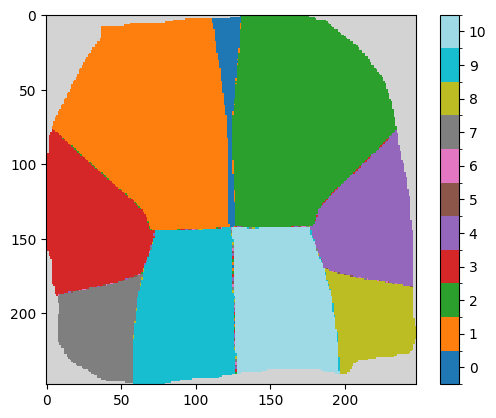

{0.0, 1.0, 2.0, 3.0, 4.0, nan, nan, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

In [129]:
from toolbox_jocha.hdf5 import get_data_from_dataset
import matplotlib.pyplot as plt
from matplotlib import colors

data, _ = get_data_from_dataset("D:/mouse_data/new_data/TO_CC/M308-12_v2_no_mvmt.h5", "registration/atlas")

# Identify valid (non-NaN) unique values
valid = ~np.isnan(data)
unique_vals = np.unique(data[valid])

# Create a discrete colormap with one color per unique integer
cmap = plt.cm.get_cmap('tab20', len(unique_vals))
cmap = cmap.with_extremes(bad='lightgrey')  # NaNs appear as grey

# Create normalization mapping each integer to its color bin
norm = colors.BoundaryNorm(boundaries=np.arange(len(unique_vals) + 1) - 0.5,
                           ncolors=len(unique_vals))

# Plot
plt.imshow(data, cmap=cmap, norm=norm, interpolation='nearest')
plt.colorbar(ticks=unique_vals)
plt.show()

x = data.flatten().tolist()
print(set(x))

We're supposed to see:

- Motor left (1)
- Motor right (2)
- Somato Left (3)
- Somato right (4)
- Visual left (7)
- Visual right (8)
- Retrosplenial left (9)
- Retrosplenial right (10)

And NO
- Auditory left (5)
- Auditory right (6)
- Temporal Association left (11)
- Temporal association right (12)
- Visceral left (13)
- Visceral right (14)

In [ ]:
import numpy as np
import networkx as nx
import bct

import numpy as np
import warnings

def community_louvain(W, gamma=1.0, M0=None, B=None):
    """
    Python translation of the MATLAB community_louvain.m from BCT

    Parameters
    ----------
    W : (n,n) array_like
        Directed/undirected weighted/binary connection matrix. Can contain
        positive and negative weights depending on objective function.
    gamma : float, optional
        Resolution parameter (default 1.0).
    M0 : (n,) array_like, optional
        Initial community affiliation vector (any integers). If None, uses 0..n-1.
        Can be any labels; they will be remapped internally.
    B : str or (n,n) array_like, optional
        If str, one of 'modularity', 'potts', 'negative_sym', 'negative_asym'.
        If array-like, treated as a custom objective matrix.

    Returns
    -------
    M : (n,) ndarray (int)
        Final community labels (zero-based).
    Q : float
        Optimized objective (modularity by default). For the matrix-B formulation
        this equals the final "intra-module" sum (trace of aggregated B).
    """
    W = np.asarray(W, dtype=float)
    if W.ndim != 2 or W.shape[0] != W.shape[1]:
        raise ValueError("W must be a square matrix.")
    n = W.shape[0]

    # detect type_B (string), or treat B as custom matrix if given as array
    if B is None:
        type_B = 'modularity'
    elif isinstance(B, str):
        type_B = B
    else:
        # custom objective matrix given
        type_B = None
        if gamma is not None:
            warnings.warn("Value of gamma is ignored in generalized mode.")

    if gamma is None:
        gamma = 1.0

    # Handle negative-weight special cases:
    if type_B in ('negative_sym', 'negative_asym'):
        W0 = W * (W > 0)          # positive weights
        s0 = W0.sum()
        if s0 == 0:
            # Avoid division by zero; B0 will be zeros
            B0 = np.zeros_like(W)
        else:
            k0 = W0.sum(axis=1).reshape(-1, 1)
            K0 = k0 @ k0.T
            B0 = W0 - gamma * K0 / s0

        W1 = -W * (W < 0)         # negative weights as positive magnitudes
        s1 = W1.sum()
        if s1 == 0:
            B1 = np.zeros_like(W)
        else:
            k1 = W1.sum(axis=1).reshape(-1, 1)
            K1 = k1 @ k1.T
            B1 = W1 - gamma * K1 / s1

    elif np.min(W) < -1e-10:
        raise ValueError(
            "The input connection matrix contains negative weights. "
            "Specify 'negative_sym' or 'negative_asym' objective-function types."
        )

    # Potts requires binary W
    if type_B == 'potts':
        if not np.array_equal(W, W.astype(bool).astype(float)):
            raise ValueError("Potts-model Hamiltonian requires a binary W.")

    # Build objective matrix B if requested by name
    if type_B is not None:
        if type_B == 'modularity':
            s = W.sum()
            if s == 0:
                raise ValueError("Total weight s is zero; modularity undefined.")
            k = W.sum(axis=1).reshape(-1, 1)
            Bmat = (W - gamma * (k @ k.T) / s) / s
        elif type_B == 'potts':
            # W binary; ~W is logical NOT
            notW = (~W.astype(bool)).astype(float)
            Bmat = W - gamma * notW
        elif type_B == 'negative_sym':
            denom = (s0 + s1) if (s0 + s1) != 0 else 1.0
            Bmat = B0 / denom - B1 / denom
        elif type_B == 'negative_asym':
            denom = s0 if s0 != 0 else 1.0
            denom2 = (s0 + s1) if (s0 + s1) != 0 else 1.0
            Bmat = B0 / denom - B1 / denom2
        else:
            raise ValueError("Unknown objective function: %s" % type_B)
    else:
        # custom matrix provided in B argument
        Bmat = np.asarray(B, dtype=float)
        if Bmat.shape != W.shape:
            raise ValueError("W and B must have the same size.")

    # Initial community vector M0 -> normalized labels (zero-based)
    if M0 is None:
        M0 = np.arange(n)
    else:
        M0 = np.asarray(M0)
        if M0.size != n:
            raise ValueError("M0 must contain n elements.")

    # Remap M0 to contiguous labels 0..k-1
    _, Mb = np.unique(M0, return_inverse=True)
    M = Mb.copy()   # current labeling (will be updated for output if needed)

    # Symmetrize B as in MATLAB: B = (B + B.')/2
    Bmat = 0.5 * (Bmat + Bmat.T)

    # Build Hnm: node-to-module degree (n x num_modules)
    num_modules = Mb.max() + 1
    Hnm = np.zeros((n, num_modules), dtype=float)
    for m in range(num_modules):
        cols = (Mb == m)
        if np.any(cols):
            Hnm[:, m] = Bmat[:, cols].sum(axis=1)

    # initial Q (objective) computed over M0 communities
    # MATLAB: Q = sum(B(bsxfun(@eq,M0,M0.')));
    # That's sum of B_ij where M0[i] == M0[j]
    mask = (M0.reshape(-1,1) == M0.reshape(1,-1))
    Q = Bmat[mask].sum()

    Q0 = -np.inf
    first_iteration = True
    eps = 1e-10

    # Main Louvain-like loop
    while Q - Q0 > eps:
        flag = True
        while flag:
            flag = False
            # loop over nodes in random order
            for u in np.random.permutation(n):
                ma = Mb[u]                      # current module of u
                # dQ for moving u into each module:
                # Hnm[u,:] - Hnm[u,ma] + B(u,u)
                dQ = Hnm[u, :].copy()
                dQ = dQ - Hnm[u, ma] + Bmat[u, u]
                dQ[ma] = 0.0
                max_dQ = dQ.max()
                mb = int(dQ.argmax())
                if max_dQ > eps:
                    flag = True
                    Mb[u] = mb
                    # update Hnm: add B[:,u] to new module column, subtract from old
                    Hnm[:, mb] += Bmat[:, u]
                    Hnm[:, ma] -= Bmat[:, u]

        # canonicalize module labels
        unique_labels, inverse = np.unique(Mb, return_inverse=True)
        Mb = inverse  # now labels are contiguous 0..nmod-1

        # update M mapping according to MATLAB logic:
        # On first iteration M = Mb; otherwise M(M0==u) = Mb(u) for u in 1..n
        if first_iteration:
            M = Mb.copy()
            first_iteration = False
        else:
            # M0 contains original node-group assignment indices (0..n-1)
            # MATLAB loop: for u=1:n, M(M0==u) = Mb(u)
            # We implement similarly: every original label value u, assign its members
            newM = M.copy()
            for u_label in range(n):
                sel = (M0 == u_label)
                if np.any(sel):
                    newM[sel] = Mb[u_label]
            M = newM

        # Build aggregated matrix B1 of size (nmod,nmod)
        nmod = Mb.max() + 1
        B1 = np.zeros((nmod, nmod), dtype=float)
        # pool weights of nodes in same module
        for i_mod in range(nmod):
            rows = (Mb == i_mod)
            if not np.any(rows):
                continue
            for j_mod in range(i_mod, nmod):
                cols = (Mb == j_mod)
                if not np.any(cols):
                    continue
                bm = Bmat[np.ix_(rows, cols)].sum()
                B1[i_mod, j_mod] = bm
                B1[j_mod, i_mod] = bm

        # Set B to aggregated matrix and restart procedure on module-level graph
        Bmat = B1
        Mb = np.arange(nmod)   # each module initially separate node
        Hnm = Bmat.copy()      # node-to-module strength

        n = nmod

        Q0 = Q
        Q = np.trace(Bmat)     # modularity/objective is trace of B (intra-module weight)

    # Final M: labels are zero-based integers
    return M.astype(int), float(Q)


def compute_modularities(fc):

    modularities = []

    # BCT, louvain undirected signed
    communities, Q = bct.modularity_louvain_und_sign(fc)
    modularities.append(Q)

    # BCT ChatGPT translation, asymetric negative weights
    M, Q = community_louvain(fc, B="negative_asym")
    modularities.append(Q)

    # BCT ChatGPT translation, symetric negative weights
    M, Q = community_louvain(fc, B="negative_sym")
    modularities.append(Q)

    # NetworkX via Louvain
    G = nx.from_numpy_array(fc, edge_attr="weight")
    communities = nx.algorithms.community.greedy_modularity_communities(G, weight="weight")
    Q = nx.algorithms.community.modularity(G, communities, weight="weight")
    modularities.append(Q)

    return modularities

def compute_modularity(fc, type="nx"):

    if type == "nx":
        G = nx.from_numpy_array(fc, edge_attr="weight")
        communities = nx.algorithms.community.greedy_modularity_communities(G, weight="weight")
        print(communities)
        # communities = nx.community.louvain_communities(G, weight="weight")
        Q = nx.algorithms.community.modularity(G, communities, weight="weight")
    elif type == "bct":
        communities, Q = bct.modularity_louvain_und_sign(fc)
        # communities = np.array([1, 2, 1, 3, 1])
        # Q = bct.modularity_louvain_und_sign(fc, communities)
        print(communities)

    return Q

min_val = -1
max_val = 1
np.random.seed(1)
method = "nx"
upper_triangle = np.random.uniform(min_val, max_val, size=(5, 5))
FC = upper_triangle + upper_triangle.T

modularities = compute_modularities(FC)
print(modularities)

# print(FC)

# mod = compute_modularity(FC, type=method)

# print(mod)

# FC[1,0] = -FC[1,0]
# FC[0,1] = -FC[0,1]

# print(compute_modularity(FC, type=method))

# G = nx.from_numpy_array(FC)

# # print(nx.adjacency_matrix(G))

# nx.draw(G)

[0.45478865086484, 0.45478865086484, 0.16797844635722337, 0.8594917811059742]


In [ ]:
dfc, _ = get_data_from_dataset("D:/mouse_data/new_data/TO_CC/M308-12_v2_no_mvmt.h5", "registration/atlas")

dict_keys(['area', 'com', 'axdir', 'axlen', 'area_smooth', 'com_smooth'])
[1136.86418706 1176.3878342  1007.9525651  ...  486.4596136   477.82614674
  597.81719744]


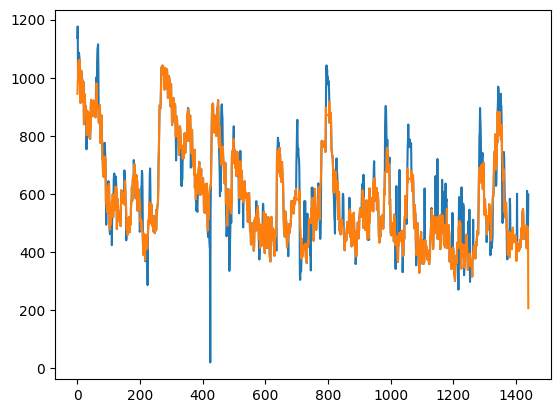

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.stats import zscore



x = np.load(f"D:/mouse_data/new_data/M308-14/raw_data/RS_M308_video_trimmed_proc.npy", allow_pickle=True)
data = x.item()

print(data["pupil"][0].keys())

# print(data)

print(data["pupil"][0]["area"])
plt.plot(data["pupil"][0]["area"])
# plt.ylim((0, 10))

plt.plot(data["pupil"][0]["area_smooth"])
# plt.ylim((0, 10))
plt.show()



In [2]:
from toolbox_jocha.hdf5 import get_attributes

filepath = f"D:/mouse_data/new_data/M322-10/formatted/M322-10_v3_mvmt.h5"

attr = get_attributes(filepath, "data")

print(attr)


{'GCaMP': True, 'age': 10, 'cohort': 3, 'monitoring_frame_range': '(45, 7308)', 'sex': 'M'}


In [18]:
import numpy as np
import os
import tifffile

num = "308-10"

folder = f"D:/mouse_data/new_data/M{num}/pupillo_face"

fm = np.load(os.path.join(folder, f"M{num}_face_motion_sliced.npy"))

pm = np.load(os.path.join(folder, f"RS_M{num.split('-')[0]}_video_trimmed_proc.npy"), allow_pickle=True).item()["pupil"][0]["area"]

# vid = tifffile.imread(os.path.join(folder, f"../raw_data/RS_M{num.split('-')[0]}_video_trimmed.mp4"))

print(fm.shape)
print(pm.shape)
# print(vid.shape)

import cv2

def count_frames_opencv(video_path):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
        return -1
    
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    cap.release()
    return frame_count

video_file = os.path.join(folder, f"../raw_data/RS_M{num.split('-')[0]}_video_trimmed.mp4")
frames = count_frames_opencv(video_file)
if frames != -1:
    print(f"Total frames in {video_file}: {frames}")

x = tifffile.imread(os.path.join(folder, f"../raw_data/GCaMP.tif"))
print(x.shape)

(1440,)
(1440,)
Total frames in D:/mouse_data/new_data/M308-10/pupillo_face\../raw_data/RS_M308_video_trimmed.mp4: 1440
(1440, 289, 290)
